In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points on time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 03/09/2019
def f_euler(F, y0, ts, p = 0):
    ys = np.array([y0])  
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(tnext, ys[-1], p)*h
        ys = np.vstack((ys,ynext))
        t = tnext
    return ys

In [4]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
## p: parametros particulares de cada modelo
def rk_4(F, y0, ts, p = 0):
    ys = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = h*F(t, ys[-1], p)
        k2 = h*F(t + h/2, ys[-1] + k1/2, p)
        k3 = h*F(t + h/2, ys[-1] + k2/2, p)
        k4 = h*F(t + h, ys[-1] + k3)
        ynext = ys[-1] + (k1/6+k2/3+k3/3+k4/6)
        ys.append(ynext)
        t = tnext
    return np.array(ys[:-1])

In [5]:
def dif_eq(t, u, p=0):
    return np.array([1.2*u[0] - 0.6*u[0]*u[1], 0.8*u[1]+0.3*u[0]*u[1]])

u0 = [2,1]
ts = np.arange(0,2,0.1)

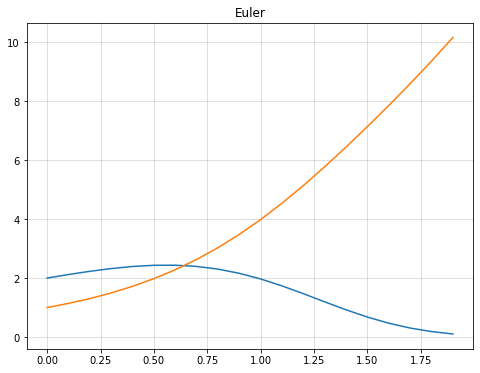

In [6]:
ys = f_euler(dif_eq, u0, ts)
plt.figure(figsize=(8,6))
plt.grid(alpha=0.5)
plt.plot(ts, ys)
plt.title('Euler')
plt.show()

In [7]:
dif_eq(ts, u0)

array([1.2, 1.4])

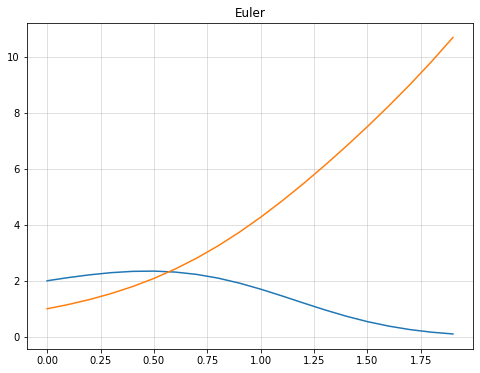

In [8]:
ys = rk_4(dif_eq, u0, ts)
plt.figure(figsize=(8,6))
plt.grid(alpha=0.5)
plt.plot(ts, ys)
plt.title('Euler')
plt.show()

In [8]:
hs = [0.1,0.05,0.025,0.01]
ts = [np.arange(0,2,h) for h in hs]
sol = rk_4(dif_eq, u0, np.arange(0,2,0.001))

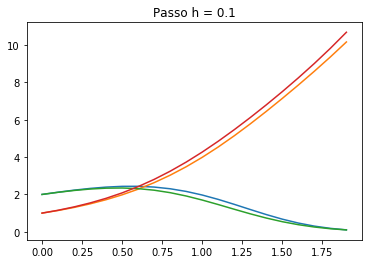

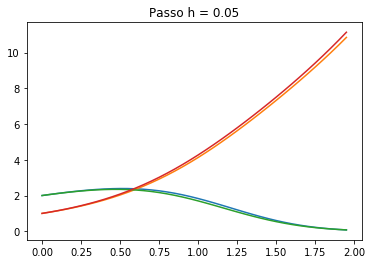

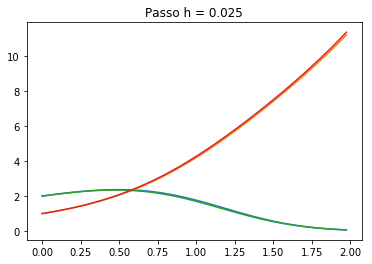

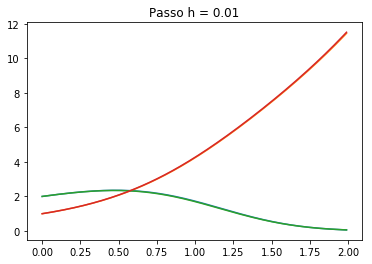

In [9]:
ys_e = []
ys_rk = []
for t in ts:
    ys_e.append(f_euler(dif_eq, u0, t))
    ys_rk.append(rk_4(dif_eq, u0, t))
for i in range(len(ts)):
    plt.plot(ts[i], ys_e[i])
    plt.plot(ts[i], ys_rk[i])
    plt.title('Passo h = ' + str(hs[i]))
    plt.show()

In [10]:
err_e = []
err_rk = []
for i in range(len(ts)):
    err_e.append(np.linalg.norm(abs(sol[-1]-ys_e[i][-1])))
    err_rk.append(np.linalg.norm(abs(sol[-1]-ys_rk[i][-1])))

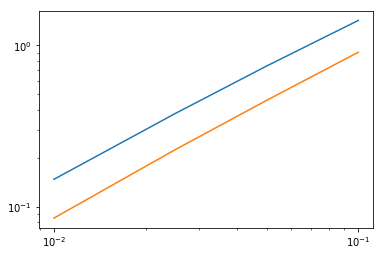

In [11]:
plt.loglog(hs, err_e)
plt.loglog(hs, err_rk)

In [12]:
err_e

[1.4297812847009916,
 0.7460624330876283,
 0.37812242650394184,
 0.14803117437495034]

In [95]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
## p: parametros particulares de cada modelo
def rk_23(F, y0, ts, p = 0):
    ys = [y0]
    ys_til = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = F(t, ys[-1], p)
        k2 = F(t + h/2, ys[-1] + k1/2, p)
        k3 = F(t + 3*h/4, ys[-1] + 3*h*k2/4, p)
        k4 = F(t + h, ys[-1] + h/9 * (2*k1 + 3*k2 + 4*k3))
        ynext = ys[-1] + h/9 * (2*k1+3*k2+4*k3)
        ynext_til = ys[-1] + h/24 * (7*k1+6*k2+8*k3+3*k4)
        ys.append(ynext)
        ys_til.append(ynext_til)
        t = tnext
    return np.array(ys[:-1]),np.array(ys_til[:-1])

In [96]:
def dif_eq2(t, u, p = 0):
    return 10*np.e**(-((t-2)**2/(2*(0.075)**2))) - 0.6*u

In [97]:
ts = np.arange(0,4,0.001)

In [98]:
u0 = 0.5
ys, sol = rk_23(dif_eq2, u0, ts)

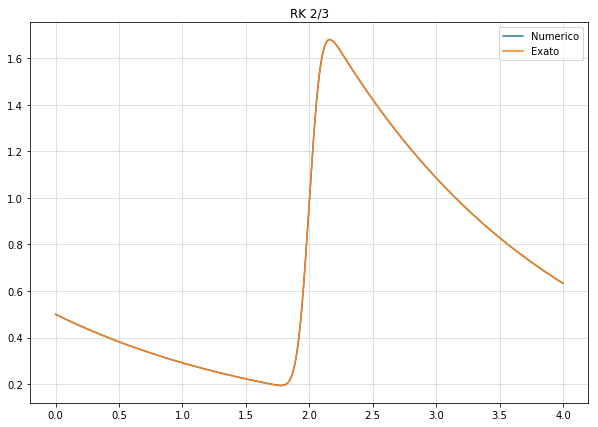

array([0.5       , 0.49973004, 0.49946023, ..., 0.63402121, 0.63367889,
       0.63333675])

In [99]:
plt.figure(figsize=(10,7))
plt.plot(ts, ys, label='Numerico')
plt.plot(ts, sol, label='Exato')
plt.grid(alpha=0.5)
plt.title('RK 2/3')
plt.legend()
plt.show()
ys

In [18]:
err = abs(sol - ys)

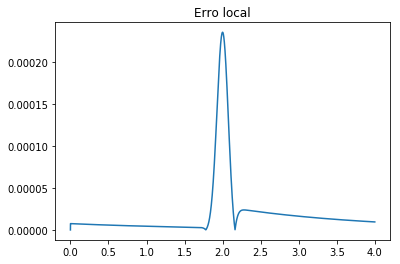

In [19]:
plt.plot(ts, err)
plt.title('Erro local')
plt.show()

In [117]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
## p: parametros particulares de cada modelo
def rk_23_adpt(F, y0, tf, tol = 1e-3, p = 0):
    ys = [y0]
    ys_til = [y0]
    h = 0.1
    ts = [0]
    ti = ts[-1]
    while ti < tf:
        k1 = F(ti, ys[-1], p)
        k2 = F(ti + h/2, ys[-1] + k1/2, p)
        k3 = F(ti + 3*h/4, ys[-1] + 3*h*k2/4, p)
        k4 = F(ti + h, ys[-1] + h/9 * (2*k1 + 3*k2 + 4*k3))
        ynext = ys[-1] + h/9 * (2*k1+3*k2+4*k3)
        ynext_til = ys[-1] + h/24 * (7*k1+6*k2+8*k3+3*k4)
        while abs(ynext_til - ynext) > tol:
            h = h/2
            k1 = F(ti, ys[-1], p)
            k2 = F(ti + h/2, ys[-1] + k1/2, p)
            k3 = F(ti + 3*h/4, ys[-1] + 3*h*k2/4, p)
            k4 = F(ti + h, ys[-1] + h/9 * (2*k1 + 3*k2 + 4*k3))
            ynext = ys[-1] + h/9 * (2*k1+3*k2+4*k3)
            ynext_til = ys[-1] + h/24 * (7*k1+6*k2+8*k3+3*k4)
        h = h*(tol/abs(ynext_til - ynext))**(1/(2))
        ys.append(ynext)
        ys_til.append(ynext_til)
        ti += h
        ts.append(ti)
    return np.array(ys),np.array(ys_til), ts

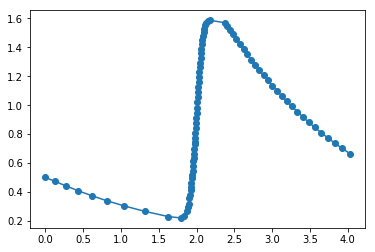

In [118]:
ys_adp, sol_adp, ts_adp = rk_23_adpt(dif_eq2, u0, tf=4)
plt.plot(ts_adp, ys_adp, '-o')
plt.show()

In [ ]:
err_adpt = abs(sol_adp - ys_adp)

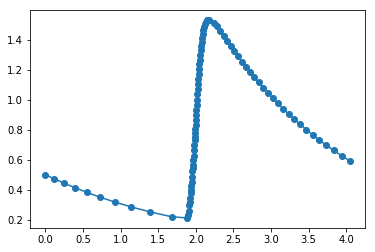

In [114]:
ys_adp, sol_adp, ts_adp = rk_23_adpt(dif_eq2, u0, tf=4, tol = 1e-3)
plt.plot(ts_adp, ys_adp, '-o')
plt.show()

In [93]:
print(ys)
while abs(ynext_til - ynext) >= tol:
h = h/2
k1 = F(t, ys[-1], p)
k2 = F(t + h/2, ys[-1] + k1/2, p)
k3 = F(t + 3*h/4, ys[-1] + 3*h*k2/4, p)
k4 = F(t + h, ys[-1] + h/9 * (2*k1 + 3*k2 + 4*k3))
ynext = ys[-1] + h/9 * (2*k1+3*k2+4*k3)
ynext_til = ys[-1] + h/24 * (7*k1+6*k2+8*k3+3*k4)

IndentationError: expected an indented block (<ipython-input-93-c1ed67d69b07>, line 3)